# Samsung Health

source:
- [Kaggle analysis - massive csv](https://www.kaggle.com/code/kmader/analyzing-samsung-health-data)
- [Medium analysis - heartbeat](https://towardsdatascience.com/extract-health-data-from-your-samsung-96b8a2e31978)
- [Medium analysis - useful plots](https://medium.com/@rao.mohsin.54/how-my-samsung-watch-changed-my-life-using-python-to-analyze-my-health-data-5beda42b9826)


In [1]:
import pandas as pd
import os
from glob import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns

samsung_base_dir="samsung-health"


In [2]:
samsung_dump_dirs = glob(os.path.join(samsung_base_dir, '*'))
samsung_dump_dir = os.path.basename(samsung_dump_dirs[0])
print(len(samsung_dump_dirs), 'dumps found, taking first:', samsung_dump_dir)

samsung_csv_paths = glob(os.path.join(samsung_base_dir, samsung_dump_dir, '*.csv'))
print(len(samsung_csv_paths), 'csvs found')

samsung_json_paths = glob(os.path.join(samsung_base_dir, samsung_dump_dir, 'jsons', '*', '*', '*.json'))
print(len(samsung_json_paths), 'jsons found')

4 dumps found, taking first: samsunghealth_ptonso_20240222225173
120 csvs found
82 jsons found


In [3]:
from IPython.display import display

readcsv = lambda x: pd.read_csv(x, skiprows=1, index_col=False)
all_csv_df = {os.path.basename(j).replace('com.samsung.', ''): readcsv(j) for j in samsung_csv_paths}

'''for k, v in all_csv_df.items():
    num_rows=v.shape[0]
    if num_rows > 0:
        print(k)
        display(v.sample(min(2, num_rows)))
        print("founded", num_rows,"rows")
        print("_"*25)
        print()'''


'for k, v in all_csv_df.items():\n    num_rows=v.shape[0]\n    if num_rows > 0:\n        print(k)\n        display(v.sample(min(2, num_rows)))\n        print("founded", num_rows,"rows")\n        print("_"*25)\n        print()'

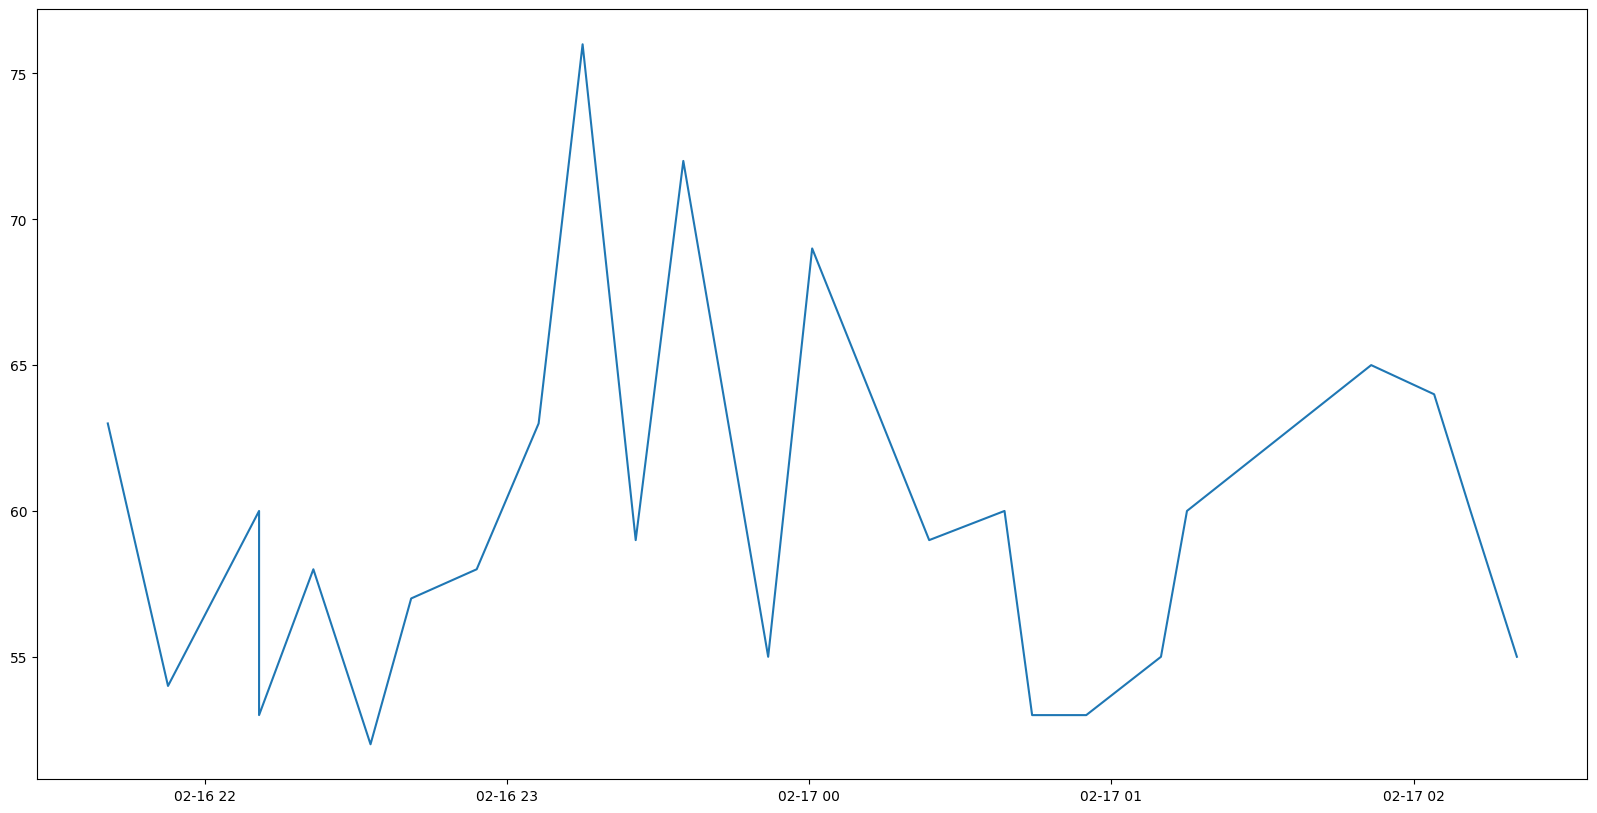

In [4]:
heart_df = pd.concat([v for k, v in all_csv_df.items() if 'heart_rate' in k and not v.empty])

heart_df.columns = heart_df.columns.str.removeprefix('com.samsung.health.heart_rate.')


for c_col in ['create_time', 'update_time']:
    heart_df[c_col] = pd.to_datetime(heart_df[c_col])

heart_df = heart_df.sort_values('create_time', ascending = True)
pd.to_datetime(heart_df['create_time'])


fig, ax1 = plt.subplots(1, 1, figsize = (20, 10))
ax1.plot(heart_df['create_time'], heart_df['heart_rate'], '-', label = 'Heart rate')

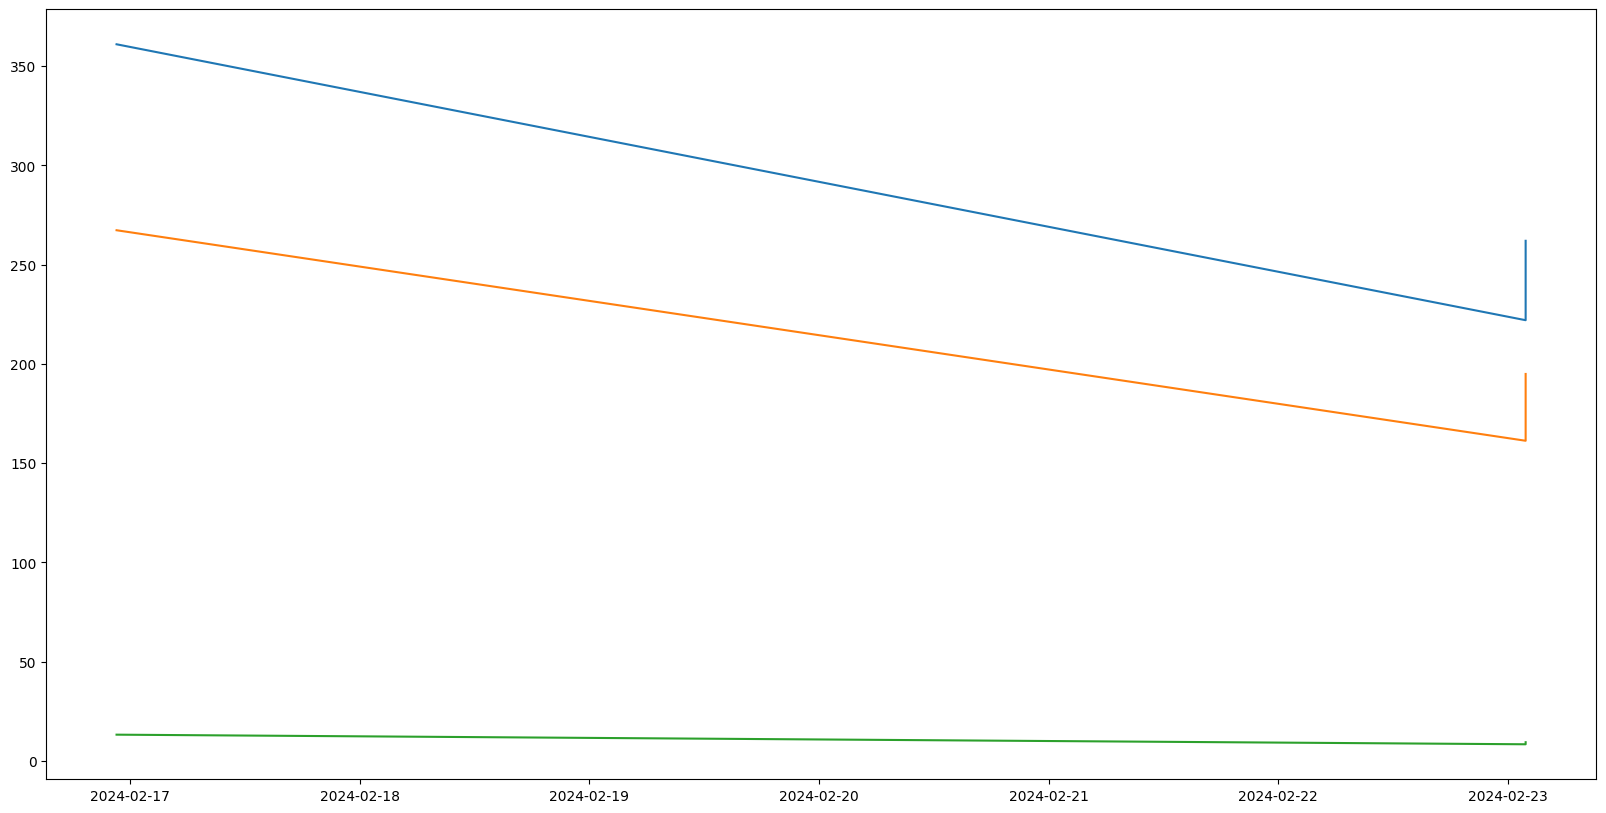

In [5]:
step_df = pd.concat([v for k, v in all_csv_df.items() if 'step_daily_trend' in k])


for c_col in ['create_time', 'update_time']:
    step_df[c_col] = pd.to_datetime(step_df[c_col])

step_df = step_df.sort_values('create_time', ascending = True)
pd.to_datetime(step_df['create_time'])


fig, ax1 = plt.subplots(1, 1, figsize = (20, 10))
ax1.plot(step_df['create_time'], step_df['count'], '-', label = 'Steps')
ax1.plot(step_df['create_time'], step_df['distance'], '-', label = "Meters")
ax1.plot(step_df['create_time'], step_df['calorie'], '-', label = "Calories")

In [6]:
# Process the JSON

from itertools import groupby, chain
import json
sam_json_dict = {}
for fold_id, files in groupby(samsung_json_paths,
                              lambda x: os.path.basename(os.path.dirname(os.path.dirname(x))).replace('com.samsung.', '')):
    c_files = list(files)

    c_json_data = [json.load(open(c_file, 'r')) for c_file in c_files]
    sam_json_dict[fold_id] = list(chain(*c_json_data)) if isinstance(c_json_data[0], list) else c_json_data

    print(fold_id+',', 'files:', len(c_files), 'readings:', len(sam_json_dict[fold_id]))
    print('\tPreview:', str(sam_json_dict[fold_id][0])[:80])
    print()

shealth.activity.day_summary, files: 34 readings: 34
	Preview: {'mAdaptiveGoal': 0, 'mIsGoalAchieved': False, 'mIsMostActiveAchieved': False, '

health.device_profile, files: 1 readings: 1
	Preview: {'capability_type': 'com.samsung.shealth.REQUEST_CAPABILITY', 'sender': 'wearabl

shealth.calories_burned.details, files: 34 readings: 34
	Preview: {'activityLevel': 0, 'age': 37, 'gender': 'M', 'height': 170.0, 'stepCount': 0, 

shealth.stress.histogram, files: 1 readings: 1
	Preview: {'version': 1, 'values': [0, 0, 0, 0, 0, 0, 0, 10000, 0, 0, 0, 0, 0, 0, 0, 9981,

shealth.step_daily_trend, files: 3 readings: 432
	Preview: {'calorie': 0.0, 'count': 0, 'distance': 0.0, 'speed': 0.0}

shealth.tracker.pedometer_day_summary, files: 7 readings: 7
	Preview: {'mBestSteps': 222, 'mBestStepsDate': 1708052400000, 'mIsGoalAchieved': False, '

health.user_profile, files: 2 readings: 2
	Preview: {'fitnessInterest': [], 'fitnessLevel': 0, 'weightPlan': 0}

